<a target="_blank" href="https://colab.research.google.com/github/olsenlabmit/Polymer-Ensemble-Similarity/blob/main/notebook/Example1_Two_Component_Polymer_Ensemble_Colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# @title Copyright & License (click to expand)

# MIT License

# Copyright (c) 2023 olsenlabmit

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

# Download Necessary Files

Downloading local python functions, tables, and dataset
from Github Repo [Polymer-Ensemble-Similarity](https://github.com/olsenlabmit/Polymer-Ensemble-Similarity.git)

In [ ]:
!git clone https://github.com/olsenlabmit/Polymer-Ensemble-Similarity.git
!mv Polymer-Ensemble-Similarity/dataset .
!mv Polymer-Ensemble-Similarity/tables .
!mv Polymer-Ensemble-Similarity/utils .

# Import Required Libraries

In [ ]:
import random
import numpy as np
import shutil
import sys
import os.path
import json
from scipy.stats import norm
import matplotlib.pyplot as plt


if not shutil.which("rdkit"):
    !pip install -q rdkit

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

if not shutil.which("grakel"):
    !pip install grakel

if not shutil.which("dgl"):
    !pip install dgl

if not shutil.which("umap"):
    !pip install umap-learn

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert shutil.which("pyomo")

from pyomo.environ import *

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc
        except:
            pass

assert shutil.which("cbc") or os.path.isfile("cbc")

from utils.load_networkx import networkx_feat
from utils import macro_unsupervised as unsup
from utils import plot

print("Import Library Done!")

# Load the Ensemble P and Ensemble Q in Example 1

## Graph Representation Index Sort Function

P = \{"p1": graph representatioon of p1, "p2", graph representatioon of p2}.

Q = \{"q1": graph representatioon of q1, "q2", graph representatioon of q2}.

These graph representations are stored in dict where python dictionary. The dictionary does not have order. Therefore, we need to have some sort functions to call them in order according their keys.


In [75]:
def sortFunc(index):
    return int(index[1:])

## Load Ensemble P

<img src="https://drive.google.com/uc?export=view&id=1b0wnyachSnJKj1pSajL5GT0erMGUwx3p"  width="50%">

where blue sphere is R0, red sphere is R1.


$w_{p_{1}} = 0.5, w_ {p_{2}} = 0.5$

In [74]:
Ensemble_P = networkx_feat(
    TXT_DATA_PATH="./dataset/Example1/Ensemble_P/",
    MON_SMILES="tables/SMILES_monomer.txt",
    FEAT="onehot",
)

Ensemble_P_indexs = list(Ensemble_P.keys())
Ensemble_P_indexs.sort(key=sortFunc)

In [27]:
with open("./dataset/Example1/Ensemble_P_weight.json", "r") as json_file:
    Ensemble_P_weight = json.load(json_file)
print(Ensemble_P_weight)

{'p1': 0.5, 'p2': 0.5}


p1: 
{0: 'R0', 1: 'R1', 2: 'R0', 3: 'R1', 4: 'R0', 5: 'R1', 6: 'R0', 7: 'R1', 8: 'R0'}


p2: 
{0: 'R1', 1: 'R0', 2: 'R1', 3: 'R0', 4: 'R1', 5: 'R0', 6: 'R1', 7: 'R0', 8: 'R1'}




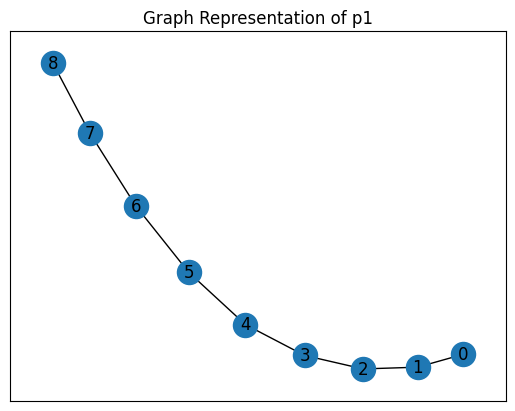

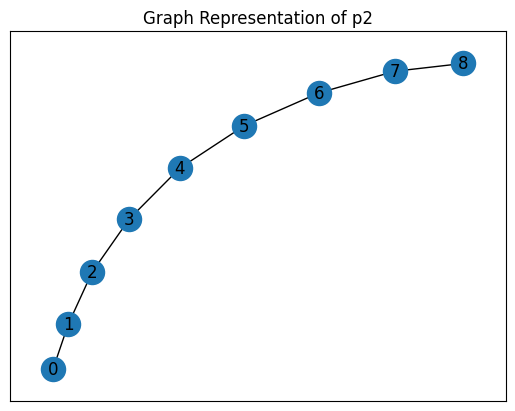

In [35]:
for i in range(0, len(Ensemble_P_indexs)):
    plt.figure()
    plt.title("Graph Representation of " + Ensemble_P_indexs[i])
    print(Ensemble_P_indexs[i] + ": ")
    plot.graph(Ensemble_P[Ensemble_P_indexs[i]])
    print("\n")

## Load Ensemble Q

<img src="https://drive.google.com/uc?export=view&id=1N3J7IsU4bSUDWdDFi4LuBqETT0pMj8WD"  width="50%">

where blue sphere is R0, red sphere is R1.

$w_{q_{1}} = 0.5, w_ {q_{2}} = 0.5$

In [41]:
Ensemble_Q = networkx_feat(
    TXT_DATA_PATH="./dataset/Example1/Ensemble_Q/",
    MON_SMILES="tables/SMILES_monomer.txt",
    FEAT="onehot",
)

Ensemble_Q_indexs = list(Ensemble_Q.keys())
Ensemble_Q_indexs.sort(key=sortFunc)

In [43]:
with open("./dataset/Example1/Ensemble_Q_weight.json", "r") as json_file:
    Ensemble_Q_weight = json.load(json_file)
print(Ensemble_Q_weight)

{'q1': 0.5, 'q2': 0.5}


q1: 
{0: 'R0', 1: 'R0', 2: 'R0', 3: 'R1', 4: 'R1', 5: 'R1', 6: 'R0', 7: 'R0', 8: 'R0'}


q2: 
{0: 'R1', 1: 'R1', 2: 'R1', 3: 'R0', 4: 'R0', 5: 'R0', 6: 'R1', 7: 'R1', 8: 'R1'}




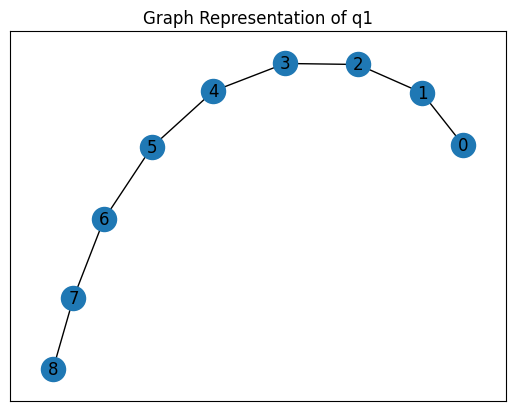

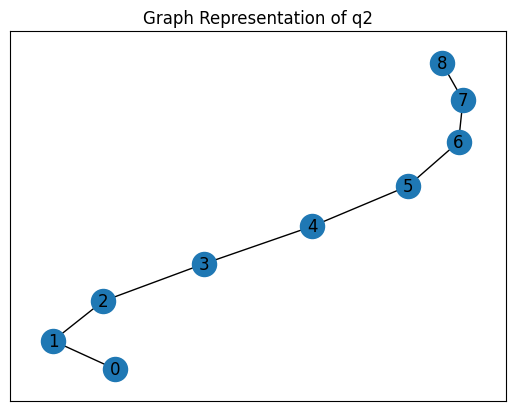

In [44]:
for i in range(0, len(Ensemble_Q_indexs)):
    plt.figure()
    plt.title("Graph Representation of " + Ensemble_Q_indexs[i])
    print(Ensemble_Q_indexs[i] + ": ")
    plot.graph(Ensemble_Q[Ensemble_Q_indexs[i]])
    print("\n")

# Polymer Ensembles Similarity Function via Earth Mover's Distance

Use the earth mover's distance (EMD) to compute pairwise similarity scores between polymer ensembles.


$ EMD (P,Q)= \min_{F}\sum_{i=1}^{m}\sum_{j=1}^{n}f_{i,j}d_{i,j}$

$ {\rm subject\ to\ } f_{i,j} \geq 0, {\rm\ for\ any\ } \ 1 \leq i \leq m, 1 \leq j \leq n $

$     \sum_{j=1}^{n}f_{i,j} =w_{pi}, {\rm for\ any} \ 1 \leq i \leq m $

$     \sum_{i=1}^{m}f_{i,j} =w_{qj}, {\rm for\ any} \ 1 \leq j \leq n $

$     \sum_{i=1}^{m}\sum_{j=1}^{n}f_{i,j} = \sum_{i}^{m} w_{pi} = \sum_{j}^{n} w_{qj} = 1 $


One polymer ensemble is defined as $P = \{(p_1,w_{p_1}) ,(p_2,w_{p_2}),...,(p_i,w_{p_i}),...,(p_m,w_{p_m})\}$ has $m$ types of polymer chains, where $p_i$ represents a type of polymer chain and  $w_{p_i}>0$ is its corresponding weight, which can be the mole fraction of this polymer chain in the polymer ensemble. Similarly, the second ensemble $Q = {(q_1,w_{q_1}),(q_2,w_{q_2}),...,(q_j,w_{q_j}),...,(q_n,w_{q_n})}$ has $n$ types of polymer chains. The sums of the weights for $P$ and $Q$ are both normalized and equal to one.

The EMD linear optimization code  refers to [Transportation Networks, ND Pyomo Notebook](https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/03.01-Transportation-Networks.html)

Once $EMD (P,Q)$ is calculated, the similarity score between $P$ and $Q$ is

$S(P,Q) = 1- EMD (P,Q)$

\\

\\

The distance ($d_{i,j}$) between one polymer molecule $p_i$ and another polymer molecule $q_j$ is calculated through graph edit distance. This part of the code builds on [GLAMOUR](https://github.com/learningmatter-mit/GLAMOUR) and networkx function [graph_edit_distance](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.similarity.graph_edit_distance.html).

$d_{\rm TOP}(g_1, g_2) = 1- \exp(-\frac{\alpha \cdot GED(g_1, g_2)}{(N_1 + N_2)/2})$

where $N_i$ is the number of nodes in graph $g_i$, $\alpha$ is a tunable parameter with the default value being 1. [Reference1](https://arxiv.org/abs/1808.05689), [Reference2](https://doi.org/10.1021/acs.macromol.3c00761)

In [53]:
def Similarity_Score_EMD_Calculation(
    ensembleP=None,
    ensembleP_weight=None,
    ensembleQ=None,
    ensembleQ_weight=None,
    alpha=1,
    print_details=False,
):
    # load the weight of Ensemble P
    Demand = {}

    ensembleP_number = len(ensembleP_weight)

    ensembleP_weight_sum = sum(ensembleP_weight.values())

    ensembleP_indexs = list(ensembleP.keys())
    ensembleP_indexs.sort(key=sortFunc)

    for i in range(0, ensembleP_number):
        Demand["P" + str(i + 1)] = (
            ensembleP_weight[ensembleP_indexs[i]] / ensembleP_weight_sum
        )

    # load the weight of Ensemble Q
    Supply = {}

    ensembleQ_number = len(ensembleQ_weight)

    ensembleQ_weight_sum = sum(ensembleQ_weight.values())

    ensembleQ_indexs = list(ensembleQ.keys())
    ensembleQ_indexs.sort(key=sortFunc)

    for j in range(0, ensembleQ_number):
        Supply["Q" + str(j + 1)] = (
            ensembleQ_weight[ensembleQ_indexs[i]] / ensembleQ_weight_sum
        )

    # load the transport flow matrix [f_ij]
    T = {}
    for i in range(0, ensembleP_number):
        for j in range(0, ensembleQ_number):
            GED = unsup.edit_distance(
                ensembleP[ensembleP_indexs[i]],
                ensembleQ[ensembleQ_indexs[j]],
                node_attr="h",
                edge_attr="e",
                upper_bound=100,
                indel_mul=1,
                sub_mul=1,
            )

            N_i = ensembleP[ensembleP_indexs[i]].number_of_nodes()

            N_j = ensembleQ[ensembleQ_indexs[j]].number_of_nodes()

            T[("P" + str(i + 1), "Q" + str(j + 1))] = 1 - np.exp(
                -alpha * GED / (0.5 * (N_i + N_j))
            )

    # Step 0: Create an instance of the model
    model = ConcreteModel()
    model.dual = Suffix(direction=Suffix.IMPORT)

    # Step 1: Define index sets
    CUS = list(Demand.keys())
    SRC = list(Supply.keys())

    # Step 2: Define the decision
    model.x = Var(CUS, SRC, domain=NonNegativeReals)

    # Step 3: Define Objective
    model.Cost = Objective(
        expr=sum([T[c, s] * model.x[c, s] for c in CUS for s in SRC]), sense=minimize
    )

    # Step 4: Constraints
    model.src = ConstraintList()
    for s in SRC:
        model.src.add(sum([model.x[c, s] for c in CUS]) <= Supply[s])

    model.dmd = ConstraintList()
    for c in CUS:
        model.dmd.add(sum([model.x[c, s] for s in SRC]) == Demand[c])

    # Step 5: call the cbc solver to solve this EMD problem
    results = SolverFactory("cbc").solve(model)

    # Step 6: return EMD result
    if "ok" == str(results.Solver.status):
        if print_details == True:
            for s in SRC:
                for c in CUS:
                    if model.x[c, s]() > 0:
                        print(
                            "Ship from ",
                            s,
                            " to ",
                            c,
                            ":",
                            model.x[c, s](),
                            "*",
                            T[c, s],
                        )
        return 1 - model.Cost()

    else:
        print("No Valid Solution Found")
        return False

# Calculation of $S(P,Q)$

In [72]:
Similarity_Score = Similarity_Score_EMD_Calculation(
    ensembleP=Ensemble_P,
    ensembleP_weight=Ensemble_P_weight,
    ensembleQ=Ensemble_Q,
    ensembleQ_weight=Ensemble_Q_weight,
    alpha=1,
    print_details=False,
)

In [73]:
print("Similarity Score between P and Q = %.2f" % Similarity_Score)

Similarity Score between P and Q = 0.72
